In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix


In [2]:
X = np.load('features.npy')
y = np.load('group.npy')
features = ['aspect', 'curvature-plan', 'curvature-prof', 'curvature', 'elevation', 'morphology', 'slope', 'tree-cover', 'patches']

In [3]:
estimators = [
    ('rfc', RandomForestClassifier()),
#     ('lda', LinearDiscriminantAnalysis()),
#     ('qda', QuadraticDiscriminantAnalysis()),
#     ('log', LogisticRegression())
]

params = {
    'rfc': {
        'n_estimators': [200],
        'max_depth': [20],
        'min_samples_split': [4000, 2000],
        'class_weight': ['balanced_subsample']
    },
    
    'lda': {
        'n_components': [2, 4, None]
    },
    
    'qda': {
        
        
    },
    
    'log': {
        'penalty' : ['l1', 'l2'],
        'C': [1.0, 0.1, 0.01, 0.001],
        'class_weight': ['balanced']
    }
    
}

In [4]:
X_ = StandardScaler().fit_transform(X[:, :-1])
y = y.astype(int)

In [20]:

results = dict()
for cl_name, clf in estimators:
    gcv = GridSearchCV(clf, param_grid=params[cl_name], n_jobs=14, scoring='balanced_accuracy', verbose=1, cv=5)
    gcv.fit(X_, y)
    print(f"Resutls for {cl_name}.")
    print(f"Balanced accuracy score: {gcv.best_score_}")
    print(f"Confusion matrix: {confusion_matrix(gcv.best_estimator_.predict(X_), y)}")
    results[cl_name] = gcv

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=14)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=14)]: Done   5 out of  10 | elapsed:  8.5min remaining:  8.5min
[Parallel(n_jobs=14)]: Done  10 out of  10 | elapsed:  8.9min finished


Resutls for rfc.
Balanced accuracy score: 0.691446998224144
Confusion matrix: [[607019   5279]
 [294476  17226]]


In [21]:
gcv.best_params_

{'class_weight': 'balanced_subsample',
 'max_depth': 20,
 'min_samples_split': 4000,
 'n_estimators': 200}

In [17]:
for f, imp in zip(features[:-1], results['rfc'].best_estimator_.feature_importances_):
    print(f"feature {f}: {imp}.")

feature aspect: 0.38636324856410287.
feature curvature-plan: 0.022507389222992558.
feature curvature-prof: 0.032563402846718686.
feature curvature: 0.019680834593444985.
feature elevation: 0.09614325902426059.
feature morphology: 0.1658324173616787.
feature slope: 0.04549242135125633.
feature tree-cover: 0.23141702703554537.


In [4]:
X_ = StandardScaler().fit_transform(X[:, :-1])
y = y.astype(int)

In [18]:
features = ['aspect', 'curvature-plan', 'curvature-prof', 'curvature', 'elevation', 'morphology', 'slope', 'tree-cover', 'patches']
features = np.array(features[:-1])

In [21]:
n_features = len(features)

In [22]:
n_features

8

In [24]:
results = []
clf = RandomForestClassifier(**{'class_weight': 'balanced_subsample',
 'max_depth': 20,
 'min_samples_split': 4000,
 'n_estimators': 10})
for j in range(2, 2 ** n_features - 1):
    print(j)
    mask = np.array(list(format(j, f'#0{n_features + 2}b')[2:]), dtype=int).astype(bool)
    if sum(mask) > 2:
        errors = cross_val_score(clf, X_[:, mask], y, n_jobs=14,scoring='balanced_accuracy')
        results.append((mask, errors))
        # print(f"Trying features {np.array(features)[mask]}: mean={errors.mean()}, std={errors.std()}.")

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254


In [16]:
features  

array(['aspect', 'curvature-plan', 'curvature-prof', 'curvature',
       'elevation', 'morphology', 'slope', 'tree-cover'], dtype='<U14')

In [34]:
for ffs, vals in sorted(results, key=lambda x: x[1].mean(), reverse=True):
    print(features[ffs], vals.mean())

['aspect' 'curvature-prof' 'curvature' 'morphology' 'slope' 'tree-cover'] 0.6930056688191624
['aspect' 'curvature-plan' 'curvature-prof' 'morphology' 'tree-cover'] 0.6928503746804482
['aspect' 'curvature-plan' 'curvature-prof' 'morphology' 'slope'
 'tree-cover'] 0.6927214847546701
['aspect' 'curvature-plan' 'curvature' 'morphology' 'slope' 'tree-cover'] 0.6926318970914196
['aspect' 'curvature-prof' 'curvature' 'morphology' 'tree-cover'] 0.6923803562282066
['aspect' 'curvature-plan' 'curvature-prof' 'curvature' 'morphology'
 'slope' 'tree-cover'] 0.6918510531542572
['aspect' 'curvature-plan' 'curvature-prof' 'curvature' 'morphology'
 'tree-cover'] 0.6917762646508296
['aspect' 'curvature-prof' 'morphology' 'slope' 'tree-cover'] 0.6912668145501557
['aspect' 'curvature' 'morphology' 'slope' 'tree-cover'] 0.6910195753370004
['aspect' 'curvature-plan' 'curvature' 'morphology' 'tree-cover'] 0.6908122180352272
['aspect' 'curvature-prof' 'morphology' 'tree-cover'] 0.690474142153551
['aspect' 'c

In [32]:
cross_val_score(clf, X_, y, n_jobs=14,scoring='balanced_accuracy')

array([0.68564661, 0.70769145, 0.70991884, 0.70607182, 0.63990373])

In [41]:
comm = []
for ffs, vals in filter(lambda x: x[1].mean()>0.69,results):
    comm.append(features[ffs].tolist())

In [45]:
from functools import reduce

In [46]:
reduce(lambda x, y: x.intersection(y), map(set, comm))

{'aspect', 'morphology', 'tree-cover'}

{'aspect', 'morphology', 'tree-cover'} -- эти предикторы всегда были в лучших результатах. Они обязательно должны быть, чтобы попытка угадать упадет ли лес в данной точке была хотя бы немного успешной... фактически это общие предикторы для все лучших случаев, т.е. тех случаев, у которых средняя точность, вычисленная по пяти случайным разбиением исходных данных на тестовую и проверочную, оказалась выше 0.69. 

<AxesSubplot:>

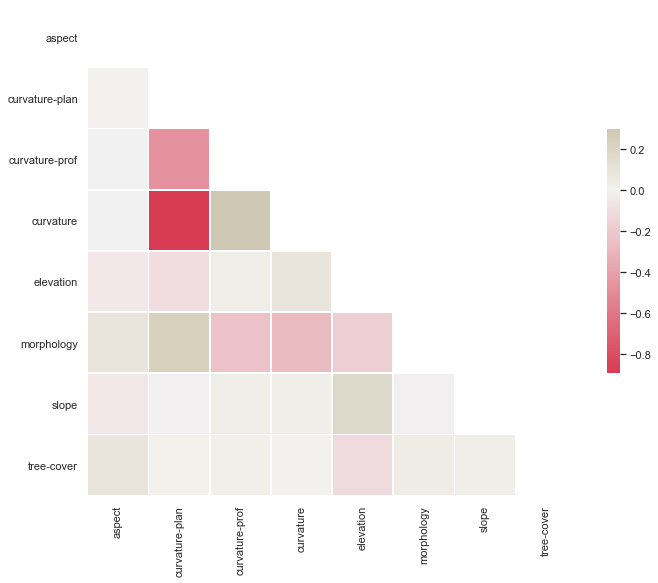

In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")


# Compute the correlation matrix
corr = np.corrcoef(X_.T)
corr = pd.DataFrame(corr, index=features, columns=features)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(7, 70, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [58]:
corr

,aspect,curvature-plan,curvature-prof,curvature,elevation,morphology,slope,tree-cover
aspect,1.000000,0.004640,-0.001803,-0.003980,-0.051151,0.087932,-0.051647,0.085936
curvature-plan,0.004640,1.000000,-0.469243,-0.895673,-0.105481,0.234606,-0.010547,0.009505
curvature-prof,-0.001803,-0.469243,1.000000,0.812634,0.025259,-0.232731,0.026091,0.016929
curvature,-0.003980,-0.895673,0.812634,1.000000,0.082498,-0.272230,0.020138,0.002217
elevation,-0.051151,-0.105481,0.025259,0.082498,1.000000,-0.173340,0.169907,-0.112668
morphology,0.087932,0.234606,-0.232731,-0.272230,-0.173340,1.000000,-0.009493,0.035092
slope,-0.051647,-0.010547,0.026091,0.020138,0.169907,-0.009493,1.000000,0.021631
tree-cover,0.085936,0.009505,0.016929,0.002217,-0.112668,0.035092,0.021631,1.000000


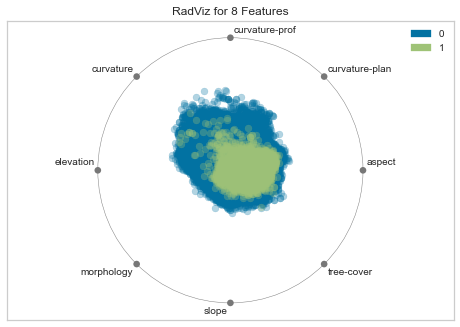

RadialVisualizer(alpha=0.3,
                 ax=<AxesSubplot:title={'center':'RadViz for 8 Features'}>,
                 classes=[0, 1])

In [10]:
from yellowbrick.features.radviz import radviz

radviz(pd.DataFrame(X_, columns=features[:-1]), y, classes=[0, 1], alpha=0.3)

In [20]:
from sklearn import manifold
from sklearn.metrics import euclidean_distances
import matplotlib.pyplot as plt


In [24]:
inds = np.random.randint(0, len(y), size=1000)
y_=y[inds]

In [15]:
similarities = euclidean_distances(X_[inds,:-1])

In [18]:
seed=42
mds = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9, random_state=seed,
                   dissimilarity="precomputed", n_jobs=-1)
pos = mds.fit(similarities).embedding_

nmds = manifold.MDS(n_components=2, metric=False, max_iter=3000, eps=1e-12,
                    dissimilarity="precomputed", random_state=seed, n_jobs=-1,
                    n_init=1)
npos = nmds.fit_transform(similarities, init=pos)

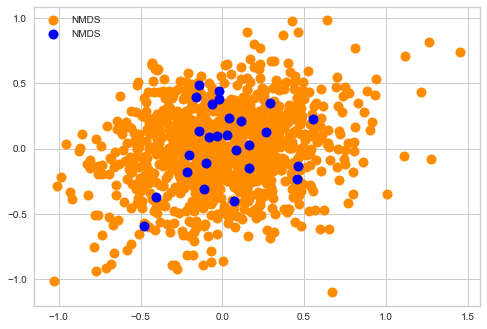

In [26]:
s = 100
plt.scatter(npos[y_==0, 0], npos[y_==0, 1], color='darkorange', s=s, lw=0, label='NMDS')
plt.scatter(npos[y_==1, 0], npos[y_==1, 1], color='blue', s=s, lw=0, label='NMDS')
plt.legend(scatterpoints=1, loc='best', shadow=False)

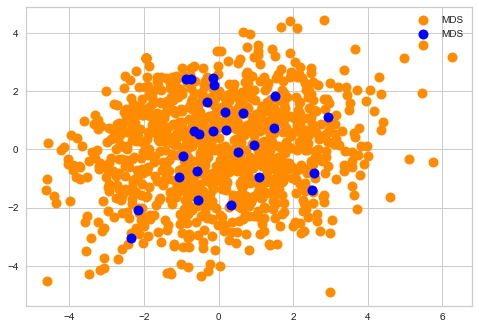

In [28]:
s = 100
plt.scatter(pos[y_==0, 0], pos[y_==0, 1], color='darkorange', s=s, lw=0, label='MDS')
plt.scatter(pos[y_==1, 0], pos[y_==1, 1], color='blue', s=s, lw=0, label='MDS')
plt.legend(scatterpoints=1, loc='best', shadow=False)